<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-адекватности-модели" data-toc-modified-id="Проверка-адекватности-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка адекватности модели</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, make_scorer

In [8]:
for path in ['/datasets/gold_recovery_train_new.csv','/datasets/gold_recovery_test_new.csv', 
             '/datasets/gold_recovery_full_new.csv']:
    if os.path.exists(path):
        if 'train' in path:
            data_train = pd.read_csv(path)
        elif 'test'in path:
            data_test = pd.read_csv(path)
        elif 'full'in path:
            data_full = pd.read_csv(path)
    else:
        print('Что-то пошло не так')


In [9]:
display(data_train.info()) # информация о данных 
display(data_test.info())
display(data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

In [10]:
display(data_train.head()) 
display(data_test.head())
display(data_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [11]:
columns_drop_zero = [column_concentrate for column_concentrate in data_train.columns if 'concentrate' in column_concentrate] 
for col in columns_drop_zero:
    data_train = data_train[data_train[col] > 0]

Значения концентраций = 0 является аномальными, поэтому такие значения нужно удалить (если концентрация какого-либо металла = 0, то она не измениться в последующие этапы очистки, а такой случай нас не интересует).

In [13]:
def efficiency(С, F, T):
    return 100 * C * ( F- T) / (F * (C - T))

In [14]:

C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

data_train_recovery_real = efficiency(C, F, T)

MAE = mean_absolute_error(data_train['rougher.output.recovery'], data_train_recovery_real)
print(MAE)

1.176521211405249e-14


Значение 'rougher.output.recovery' расчитано правильно.

In [15]:
#найдем разницу множеств колонок
delta_columns = set(data_train.columns) - set(data_test.columns)
display(delta_columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют некоторые calculation и output характеристики процесса, поскольку их невозможно получить во время выполенения процесса. 

In [16]:
print(data_train.isna().sum().sum())
print(data_test.isna().sum().sum())
print(data_full.isna().sum().sum())

2918
90
4481


In [17]:
#заполним пропущенные значения, используя интерполяцию
data_train = data_train.interpolate()
data_train.isna().sum().sum()

0

In [18]:
data_test = data_test.dropna()
data_test.isna().sum().sum()

0

In [19]:
data_full.isna().sum().sum()

4481

Пропуски в `df_train` заполняются с помощью интерполяции.
В `df_test` малое число пропущенных значений, поэтому их можно удалить.

## Анализ данных

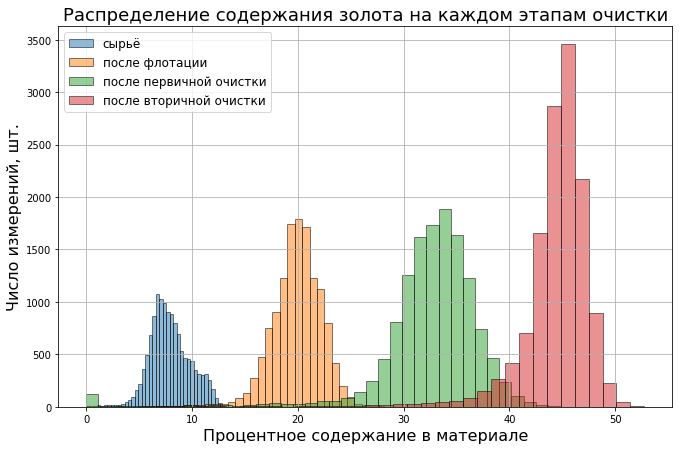

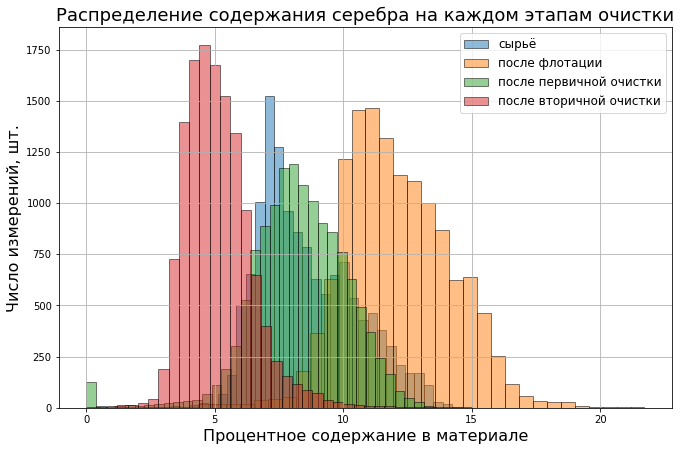

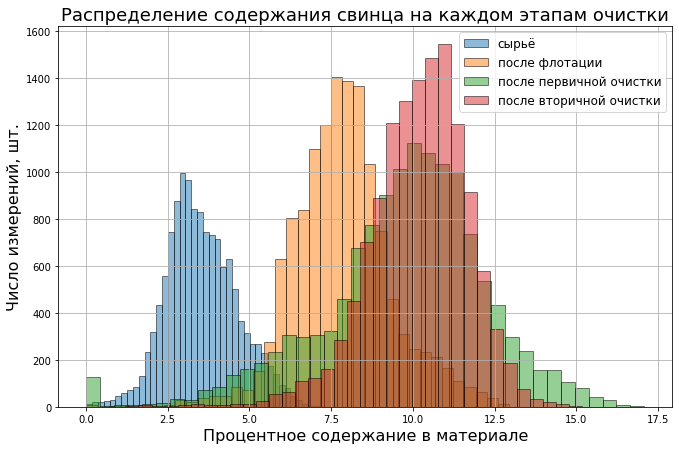

In [20]:
metals = {'au': 'золота', 'ag': 'серебра', 'pb': 'свинца'}
stages = [
        'rougher.input.feed_',
        'rougher.output.concentrate_',
        'primary_cleaner.output.concentrate_',
        'final.output.concentrate_']
#legend = 
for key_g, values_g in metals.items():
    plt.figure(figsize=(11, 7))
    plt.grid(True)
    for stage in stages:
        concentration = data_train[f'{stage}{key_g}']
        
        plt.hist(concentration, bins=40,edgecolor = 'black',  alpha=0.5)
        plt.title(f'Распределение содержания {values_g} на каждом этапам очистки', fontsize=18); 
        plt.ylabel('Число измерений, шт.', fontsize=16)
        plt.xlabel(f'Процентное содержание в материале', fontsize=16)
        plt.legend(['сырьё', 'после флотации', 'после первичной очистки', 'после вторичной очистки'], fontsize=12);

Концентрация золота при обогащении руды повышается, концентрация свинца увеличивается медленнее, а концентрация серебра падет с каждым следующим этапом получения золота.

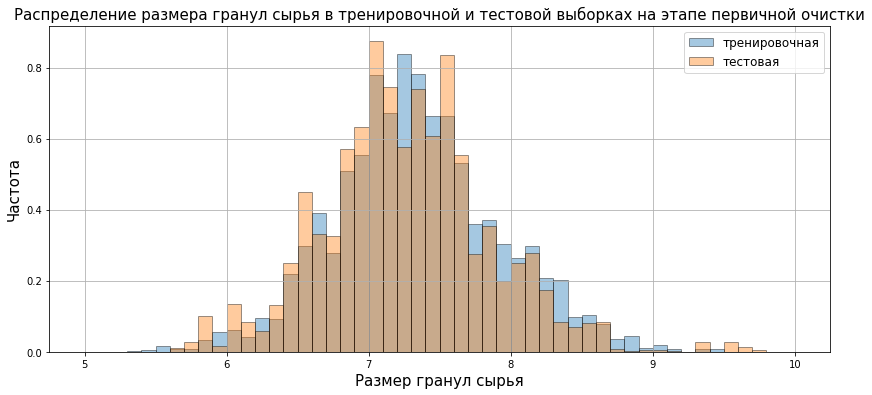

In [35]:
data_train['primary_cleaner.input.feed_size'].plot.hist(range=(5, 10), bins=50, 
                                                      figsize=(16, 6), edgecolor = 'black', density=True, alpha = 0.4)
data_test['primary_cleaner.input.feed_size'].plot.hist(range=(5, 10), bins=50,  
                                                     figsize=(14, 6),edgecolor = 'black',  density=True, alpha = 0.4, grid=True)
plt.title('Распределение размера гранул сырья в тренировочной и тестовой выборках на этапе первичной очистки', fontsize=15) 
plt.ylabel('Частота', fontsize=15)
plt.xlabel('Размер гранул сырья', fontsize=15);
plt.legend([ 'тренировочная', 'тестовая'], fontsize=12);

Распределения гранул сырья на тренировочных и тестовых выборках похожи. 

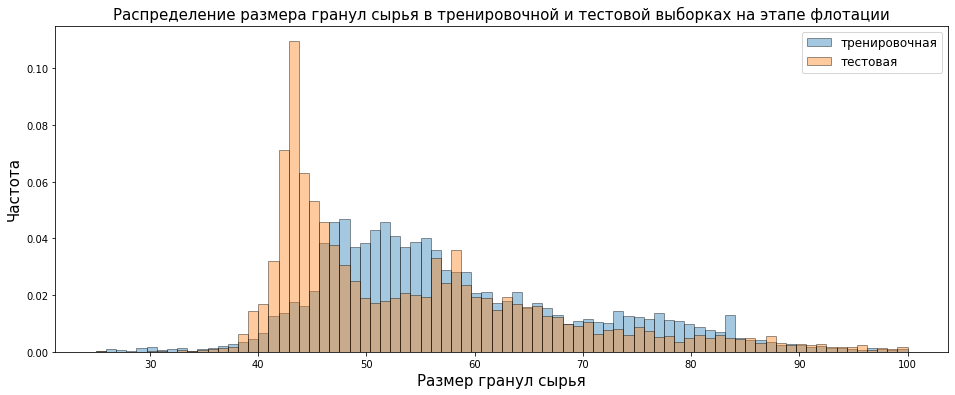

In [43]:
data_train['rougher.input.feed_size'].plot.hist(range=(25, 100), bins=80, 
                                                      figsize=(16, 6), edgecolor = 'black', density=True, alpha = 0.4)
data_test['rougher.input.feed_size'].plot.hist(range=(25, 100), bins=80, 
                                                      figsize=(16, 6), edgecolor = 'black', density=True, alpha = 0.4)
plt.title('Распределение размера гранул сырья в тренировочной и тестовой выборках на этапе флотации', fontsize=15) 
plt.ylabel('Частота', fontsize=15)
plt.xlabel('Размер гранул сырья', fontsize=15);
plt.legend([ 'тренировочная', 'тестовая'], fontsize=12);

В тестовой выборке доля гранул с размером примерно от 36 до 48 больше, чем в тренировочной на этапе флотации. А гранулы размером примерно от 48 до 58 чаще встречаются в тренировочной выборке. Распределение доли гранул других размеров во многом похоже.

In [844]:
name_sum = []

for stage in stages:    

    data_train[f'{stage}sum'] = 0
    name_sum.append(f'{stage}sum')
    for key_g, values_g in metals.items():      
        data_train[f'{stage}sum'] += data_train[f'{stage}{key_g}']
        
concentration = data_train[name_sum]

In [845]:
stages = ['сырьё', 'после флотации', 'после первичной очистки', 'после вторичной очистки']

In [846]:
concentration.columns = stages

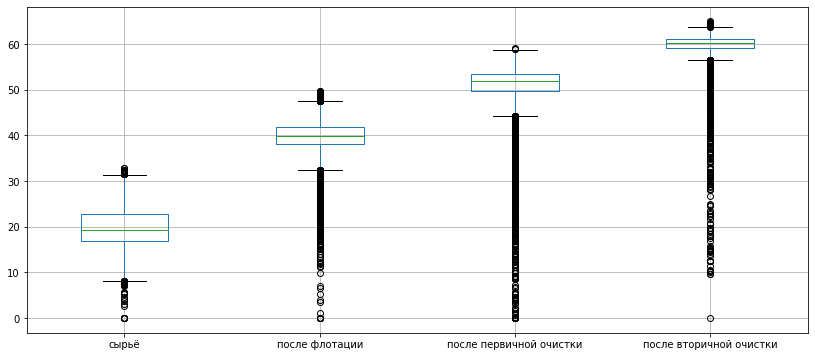

In [847]:
concentration.boxplot(figsize=(14, 6));

На гистограммах распределений суммарных концентраций есть выбросы, их нужно удалить для всех видов концентрации для обучающей выборке. 

In [848]:

for name in name_sum:    
    data_train = data_train[data_train[name] > data_train[name].quantile(0.05)]
    

In [849]:
concentration2 = data_train[name_sum]
concentration2.columns = stages

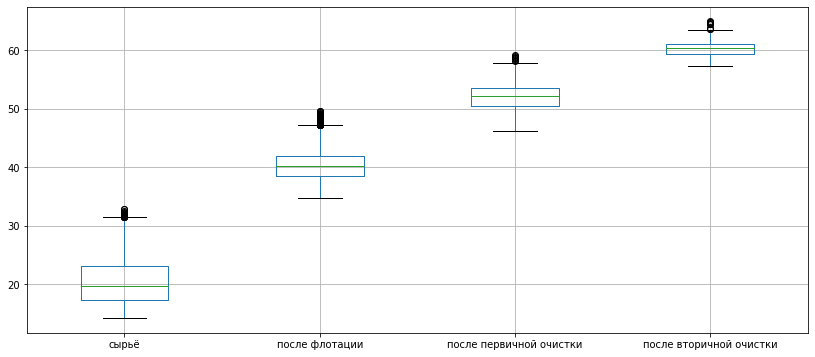

In [850]:
concentration2.boxplot(figsize=(14, 6));

Удалили данные, для которых суммарная концентрация меньше квантиля 0.05.

## Модель

In [851]:
def smape(prediction, target): # симметричное среднее абсолютное процентное отклонение
    return np.mean(np.abs(prediction - target)/(np.abs(prediction) + np.abs(target))) * 200

In [852]:
scoring = make_scorer(smape, greater_is_better=False)

In [853]:
def smape_final(smape1, smape2):# итоговая метрика
    return 0.25 * smape1 + 0.75 * smape2

In [854]:
features = data_test.columns.drop('date') # признаки кроме целевых
targets = ['rougher.output.recovery', 'final.output.recovery'] # целевые признаки

In [855]:
data_test = data_test.merge(
    data_full[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date', how='left')


In [856]:
#удалим лишние колонки
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

In [857]:
features_train = data_train[features]
features_test = data_test[features]

target_train = data_train[targets]

target_test_rougher = data_test[targets[0]] 
target_test_final  = data_test[targets[1]] 


In [858]:
features_test.head(5)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


### Линейная регрессия 

In [859]:
model = LinearRegression()

In [860]:
smape1 = cross_val_score(model, features_train, 
                         target_train['rougher.output.recovery'], scoring = scoring, cv = 5).mean()

In [861]:
print('Cреднее sMAPE для различных валидационных и тренировочных выборок на данных чернового концентрата:', -smape1)

Cреднее sMAPE для различных валидационных и тренировочных выборок на данных чернового концентрата: 6.85029863404205


In [862]:
smape2 = cross_val_score(model, features_train, 
                         target_train['final.output.recovery'], scoring = scoring, cv = 5).mean()

In [863]:
print('Cреднее sMAPE для различных валидационных и тренировочных выборок на данных финального концентрата:', -smape2)

Cреднее sMAPE для различных валидационных и тренировочных выборок на данных финального концентрата: 9.816051364174067


In [864]:
print('Итоговое sMAPE для линейной регрессии:', -smape_final(smape1, smape2))

Итоговое sMAPE для линейной регрессии: 9.074613181641062


### Случайный лес

In [865]:
grid = GridSearchCV( # для подбора параметров случайного леса
    RandomForestRegressor(random_state=12345),
    param_grid={'max_depth':range(1, 9, 2), 'n_estimators':range(10, 51, 10)}, # меняем гиперпараметры
    scoring = scoring, 
    cv = 5 # разделение данных на 5 частей, одну из них используем как валидационную
)

In [866]:
%%time
grid.fit(features_train, target_train['rougher.output.recovery'])


CPU times: user 4min 32s, sys: 302 ms, total: 4min 32s
Wall time: 4min 37s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 9, 2),
                         'n_estimators': range(10, 51, 10)},
             scoring=make_scorer(smape, greater_is_better=False))

In [867]:
best_rougher = grid.best_estimator_# лучший лес
display(best_rougher)

RandomForestRegressor(max_depth=7, n_estimators=30, random_state=12345)

In [868]:
smape1 = grid.best_score_
print('Значение sMAPE для лучших параметров случайного леса на данных чернового концентрата:', -smape1)

Значение sMAPE для лучших параметров случайного леса на данных чернового концентрата: 6.181304892708541


In [869]:
%%time
grid.fit(features_train, target_train['final.output.recovery'])

CPU times: user 4min 35s, sys: 563 ms, total: 4min 35s
Wall time: 4min 38s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 9, 2),
                         'n_estimators': range(10, 51, 10)},
             scoring=make_scorer(smape, greater_is_better=False))

In [870]:
best_final = grid.best_estimator_# лучший лес
display(best_final)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)

In [871]:
smape2 = grid.best_score_
print('Значение sMAPE для лучших параметров случайного леса на данных финального концентрата:', -smape2)

Значение sMAPE для лучших параметров случайного леса на данных финального концентрата: 8.186306493367287


In [872]:
print('Итоговое sMAPE для случайного леса:', -smape_final(smape1, smape2))

Итоговое sMAPE для случайного леса: 7.685056093202601


Лучшие результаты позазали случайные леса с параметрами, укзанными выше.

### Проверка лучшей модели на тестовой выборке

In [875]:
predicted_test_rougher = best_rougher.predict(features_test)

test_smape1 = smape(target_test_rougher, predicted_test_rougher)
print('Значение sMAPE для лучших параметров случайного леса на данных чернового концентрата для тестовой выборки:',
      test_smape1)

predicted_test_final = best_final.predict(features_test)

test_smape2 = smape(target_test_final, predicted_test_final)

print('Значение sMAPE для лучших параметров случайного леса на данных финального концентрата для тестовой выборки:',
      test_smape2)
print('Итоговое sMAPE для случайного леса для тестовой выборки:', smape_final(test_smape1, test_smape2))

Значение sMAPE для лучших параметров случайного леса на данных чернового концентрата для тестовой выборки: 7.825758009824388
Значение sMAPE для лучших параметров случайного леса на данных финального концентрата для тестовой выборки: 9.381277485428468
Итоговое sMAPE для случайного леса для тестовой выборки: 8.992397616527448


### Проверка адекватности модели

In [876]:
model = DummyRegressor(strategy="mean")

model.fit(features_train, target_train['rougher.output.recovery'])

predicted_test =model.predict(features_test)
smape1 = smape(target_test_rougher, predicted_test)


model.fit(features_train, target_train['final.output.recovery'])
predicted_test =model.predict(features_test)
smape2 = smape(target_test_final, predicted_test)

print('Итоговое sMAPE для DummyRegressor для тестовой выборки:', smape_final(smape1, smape2))

Итоговое sMAPE для DummyRegressor для тестовой выборки: 9.093777796113807


Модели случайного леса адекватны, поскольку величина sMAPE для DummyRegressor заметно больше, чем для моделей случайного леса.

## Вывод

1. Концентрация золота при обогащении руды повышается, концентрация свинца увеличивается медленнее, а концентрация серебра падет с каждым следующим этапом получения золота.
2. Распределения гранул сырья на тренировочных и тестовых выборках похожи на этапе первичной очистки. 
3. В тестовой выборке доля гранул с размером примерно от 36 до 48 больше, чем в тренировочной на этапе флотации. А гранулы размером примерно от 48 до 58 чаще встречаются в тренировочной выборке. Распределение доли гранул других размеров во многом похоже на этапе флотации.
4. Лучшие результаты показали случайные леса с параметрами, указанными выше, полученные модели оказались адекватными.